# Advanced Regression

In this week's tutorial, we will be working through some examples of how we can use regression methods to understand the relationship between some predictors and a response variable.

This week we will again be working with Python, using **Pandas**, **scikit-learn**, and [**statsmodels**](https://www.statsmodels.org/stable/index.html). **statsmodel** is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. It provides a nice summary function for linear regression.

This workshop will cover the use of **linear regression**, **stepwise regression**, **Lasso**, **regression tree**, and **random forest regressor**. This sounds like a lot in one workshop, but you'll begin to get a sense of how they differ after comparing the results.

Let's first import the basic libraries we will need. `Pandas` for data import and handling, `matplotlib` for graphing non-Pandas arrays, and `Numpy` for maths tools. **Run the script below to get started.**

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [ ]:
#Use this to convert the JSON extracted from the database to csv named "cleaned.csv"
#df = pd.read_json (r'Path where the JSON file is saved\File Name.json')
#df.to_csv (r'Path where the new CSV file will be stored\New File Name.csv', index = None)

### Data Interrogation

The dataset you will use relates to daily counts of rented bicycles from the bicycle rental company Capital-Bikeshare in Washington D.C, along with weather and seasonal information. The goal here is to predict how many bikes will be rented depending on the weather and the day. The original data can be downloaded from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

The dataset used in this workshop has been slightly processed by Christoph Molnar. You can find the processing R-script in his [Github repository](https://github.com/christophM/interpretable-ml-book/blob/master/R/get-bike-sharing-dataset.R). Here, the dataset is provided as a csv file on Moodle.


In [46]:
#reading the cleaned file
trees_in_Camden = pd.read_csv('cleaned.csv')

In [47]:
trees_in_Camden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 24 columns):
Unnamed: 0              19919 non-null int64
id                      19919 non-null int64
No_Trees                19919 non-null int64
Site_Name               19919 non-null object
Sci_Name                19919 non-null object
Com_Name                19919 non-null object
Date                    19919 non-null object
Height_M                19919 non-null float64
Spread_M                19919 non-null float64
Diameter_CM             19919 non-null float64
Maturity                19919 non-null object
Condition               19919 non-null object
Removed_Soon            19919 non-null bool
Newly_Planted           19919 non-null bool
Amenity_Value           19919 non-null float64
Carbon_StorageKG        19919 non-null float64
Carbon_Sequest_YR       19919 non-null float64
Pollution_Year_grams    19919 non-null float64
Ward_Code               19919 non-null object
Ward_Name        

In [48]:
trees_in_Camden.head()

,Unnamed: 0,id,No_Trees,Site_Name,Sci_Name,Com_Name,Date,Height_M,Spread_M,Diameter_CM,...,Amenity_Value,Carbon_StorageKG,Carbon_Sequest_YR,Pollution_Year_grams,Ward_Code,Ward_Name,Lon,Lat,Loc,Uploaded
0,2,4,1,DYNHAM ROAD,Betula jacquemontii,Birch - Himalayan,2018-09-14 00:00:00,8.0000,3.0000,15.0000,...,"1,456.3900",33.1000,3.0000,27.3000,E05000140,Kilburn,-0.1932,51.5440,"(51.543997, -0.193201)",2020-04-05 20:31:00
1,3,5,1,Denton Estate,Tilia europaea,Lime - Common,2020-03-19 00:00:00,16.0000,8.0000,42.0000,...,"14,272.6000",269.7000,7.6000,265.0000,E05000136,Haverstock,-0.1512,51.5454,"(51.545382, -0.151179)",2020-04-05 20:31:00
2,4,6,1,KINGSGATE ROAD,Prunus padus,Cherry - Bird,2018-09-20 00:00:00,13.0000,5.0000,37.0000,...,"6,892.1300",215.6000,7.9000,128.8000,E05000140,Kilburn,-0.1958,51.5430,"(51.543, -0.195794)",2020-04-05 20:31:00
3,7,10,1,SKARDU ROAD,Betula papyrifera,Paper birch,2018-08-29 00:00:00,8.0000,7.0000,26.0000,...,"4,375.6400",142.1000,6.6000,114.8000,E05000132,Fortune Green,-0.2103,51.5546,"(51.554557, -0.210279)",2020-04-05 20:31:00
4,11,16,1,Wendling Estate,Sorbus,Rowan,2020-03-17 00:00:00,6.0000,3.0000,29.0000,...,"7,258.2100",126.0000,5.3000,20.6000,E05000134,Gospel Oak,-0.1553,51.5514,"(51.551437, -0.155297)",2020-04-05 20:31:00


In [124]:
trees_in_Camden_sample= trees_in_Camden[(trees_in_Camden.Com_Name =='London plane') | (trees_in_Camden.Com_Name =='Lime - Common') | (trees_in_Camden.Com_Name =='Maple - Norway')]
trees_in_Camden_sample

,Unnamed: 0,id,No_Trees,Site_Name,Sci_Name,Com_Name,Date,Height_M,Spread_M,Diameter_CM,...,Amenity_Value,Carbon_StorageKG,Carbon_Sequest_YR,Pollution_Year_grams,Ward_Code,Ward_Name,Lon,Lat,Loc,Uploaded
1,3,5,1,Denton Estate,Tilia europaea,Lime - Common,2020-03-19 00:00:00,16.0000,8.0000,42.0000,...,"14,272.6000",269.7000,7.6000,265.0000,E05000136,Haverstock,-0.1512,51.5454,"(51.545382, -0.151179)",2020-04-05 20:31:00
11,32,43,1,SOUTH GROVE,Tilia europaea,Lime - Common,2017-04-07 00:00:00,14.0000,9.0000,39.0000,...,"11,486.0400",200.1000,6.4000,390.6000,E05000137,Highgate,-0.1506,51.5697,"(51.569681, -0.15058)",2020-04-05 20:31:00
14,37,53,1,"PANCRAS ROAD, ST. PANCRAS GDNS (LS)",Tilia europaea,Lime - Common,2020-04-29 00:00:00,26.0000,9.0000,69.0000,...,"46,225.7500",783.1000,14.0000,365.0000,E05000143,St Pancras and Somers Town,-0.1304,51.5356,"(51.535554, -0.130423)",2020-04-05 20:31:00
15,38,54,1,LANCASTER GROVE,Tilia europaea,Lime - Common,2018-07-19 00:00:00,10.0000,8.0000,32.0000,...,"9,942.2700",112.6000,4.6000,294.9000,E05000128,Belsize,-0.1659,51.5454,"(51.545405, -0.165928)",2020-04-05 20:31:00
16,39,55,1,"PURCHESE STREET, OPEN SPACE (LS)",Platanus x hispanica,London plane,2020-04-30 00:00:00,18.0000,9.0000,58.0000,...,"32,661.9200",768.4000,17.3000,428.0000,E05000143,St Pancras and Somers Town,-0.1287,51.5323,"(51.532339, -0.128696)",2020-04-05 20:31:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19891,23125,23405,1,PATSHULL ROAD,Acer platanoides 'Unknown vari,Maple - Norway,2017-06-21 00:00:00,14.0000,8.0000,49.0000,...,"16,116.8800",597.3000,12.2000,347.7000,E05000131,Cantelowes,-0.1358,51.5469,"(51.54686, -0.135756)",2020-04-05 20:31:00
19894,23128,23408,1,SHARPLES HALL STREET,Platanus x hispanica,London plane,2019-09-30 00:00:00,10.0000,7.0000,43.0000,...,"13,962.9800",433.5000,10.9000,205.0000,E05000130,Camden Town with Primrose Hill,-0.1569,51.5410,"(51.541007, -0.156913)",2020-04-05 20:31:00
19914,23148,23428,1,"LINCOLN'S INN FIELDS, GARDENS (LS)",Platanus x hispanica,London plane,2018-04-20 00:00:00,23.0000,20.0000,111.0000,...,"99,689.7400","4,334.4000",37.6000,"1,578.6000",E05000138,Holborn and Covent Garden,-0.1160,51.5157,"(51.515727, -0.116045)",2020-04-05 20:31:00
19915,23149,23429,1,Raglan Street Estate,Acer platanoides,Maple - Norway,2019-04-16 00:00:00,15.0000,8.0000,52.0000,...,"23,336.7300",659.6000,14.5000,378.8000,E05000139,Kentish Town,-0.1424,51.5488,"(51.548798, -0.14245)",2020-04-05 20:31:00


In [125]:
#drop columns/variables such as id,number of trees,site name etc..
trees_in_Camden_sample.head()
trees_in_Camden_Cleaned=trees_in_Camden_sample.drop(['Unnamed: 0','Maturity','id','No_Trees','Site_Name','Com_Name','Sci_Name','Date','Removed_Soon','Newly_Planted','Ward_Code','Ward_Name','Lon','Lat','Loc','Loc','Uploaded','Amenity_Value'],axis = 1)
trees_in_Camden_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5468 entries, 1 to 19918
Data columns (total 7 columns):
Height_M                5468 non-null float64
Spread_M                5468 non-null float64
Diameter_CM             5468 non-null float64
Condition               5468 non-null object
Carbon_StorageKG        5468 non-null float64
Carbon_Sequest_YR       5468 non-null float64
Pollution_Year_grams    5468 non-null float64
dtypes: float64(6), object(1)
memory usage: 341.8+ KB


There are two data types: categorical (aka `object`), and numerical (including `int64` and `float64`). 

Before undertaking regression, several steps should be done, which include:
- Converting categorical variables into dummy variables
- Dealing with multicollinearity (and removing some variables if necessary)

### Converting categorical variables
First, we need to convert categorical variables into dummy/indicator variables, using `One-Hot Encoding`.

In [126]:
trees_in_Camden_numeric = pd.get_dummies(trees_in_Camden_Cleaned)

In [127]:
# check out the new dataFrame
trees_in_Camden_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5468 entries, 1 to 19918
Data columns (total 10 columns):
Height_M                5468 non-null float64
Spread_M                5468 non-null float64
Diameter_CM             5468 non-null float64
Carbon_StorageKG        5468 non-null float64
Carbon_Sequest_YR       5468 non-null float64
Pollution_Year_grams    5468 non-null float64
Condition_Excellent     5468 non-null uint8
Condition_Fair          5468 non-null uint8
Condition_Good          5468 non-null uint8
Condition_Poor          5468 non-null uint8
dtypes: float64(6), uint8(4)
memory usage: 320.4 KB


Remember that, a cateogircal variable of K categories or levels, usually enters a regression as a sequence of K-1 dummy variables. The level that is left out becomes the reference level, and this is important for interpreting the regression model.

Here we manually choose the reference level for each categorical variable and exclude them from the DataFrame. You can change the reference levels if you want.

In [128]:
trees_in_Camden_final = trees_in_Camden_numeric.drop(['Condition_Excellent'], axis=1)

# double check the result
trees_in_Camden_final.head()

,Height_M,Spread_M,Diameter_CM,Carbon_StorageKG,Carbon_Sequest_YR,Pollution_Year_grams,Condition_Fair,Condition_Good,Condition_Poor
1,16.0000,8.0000,42.0000,269.7000,7.6000,265.0000,0,1,0
11,14.0000,9.0000,39.0000,200.1000,6.4000,390.6000,0,1,0
14,26.0000,9.0000,69.0000,783.1000,14.0000,365.0000,0,1,0
15,10.0000,8.0000,32.0000,112.6000,4.6000,294.9000,0,1,0
16,18.0000,9.0000,58.0000,768.4000,17.3000,428.0000,0,1,0


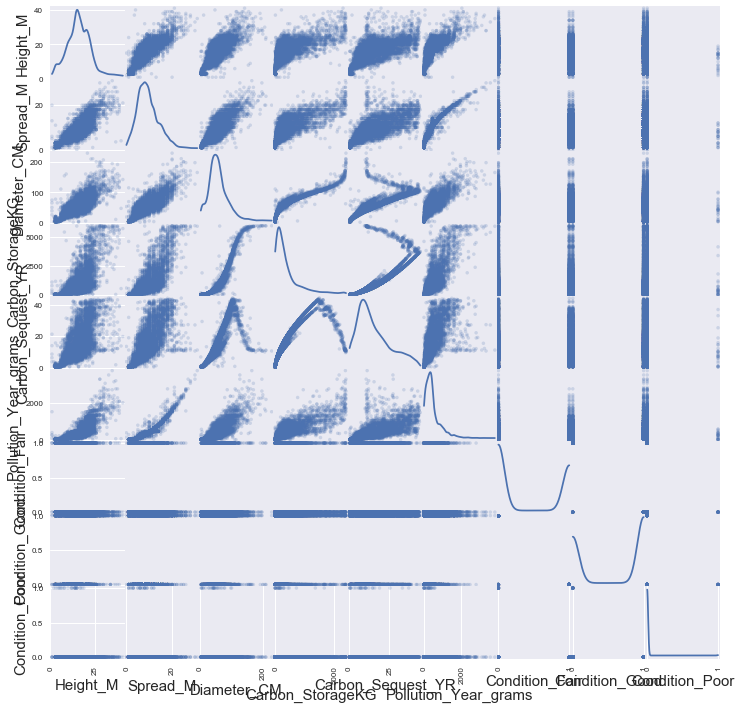

In [129]:
# takes the dataset, an alpha value for opacity, a figure size setting, and a specification of the diagonal charts
output = pd.plotting.scatter_matrix(trees_in_Camden_final, alpha=0.2, figsize=(12, 12), diagonal='kde')

### Dealing with multicollinearity

In regression, `colinearity` is the problem when **two** variables are highly correlated and therefore contain similar information about the variance within the dataset. Colinearity among variables can be detected by creating a correlation matrix.

On the other hand, `multicolinearity` emerges when three or more variables, which are highly correlated, are included in a model. It can emerge even when each pair of variables involved are not colinear. For example, think of the four dummy variables relating to seasons in the `bike_rental_numeric` dataset.  

You can check the colinearity between attributes using a correlation matrix as below. Think of these two questions:

- **What can you say about this plot? For example, which pair of variables are highly correlated, and can you explain it?**
- **Can you use the correlation matrix to deal with multicolinearity, for example, by removing one of the two variables if their correlation is above 0.75?** (Hint: a short answer is NO)

Text(0.5, 1.05, 'Correlation Matrix')

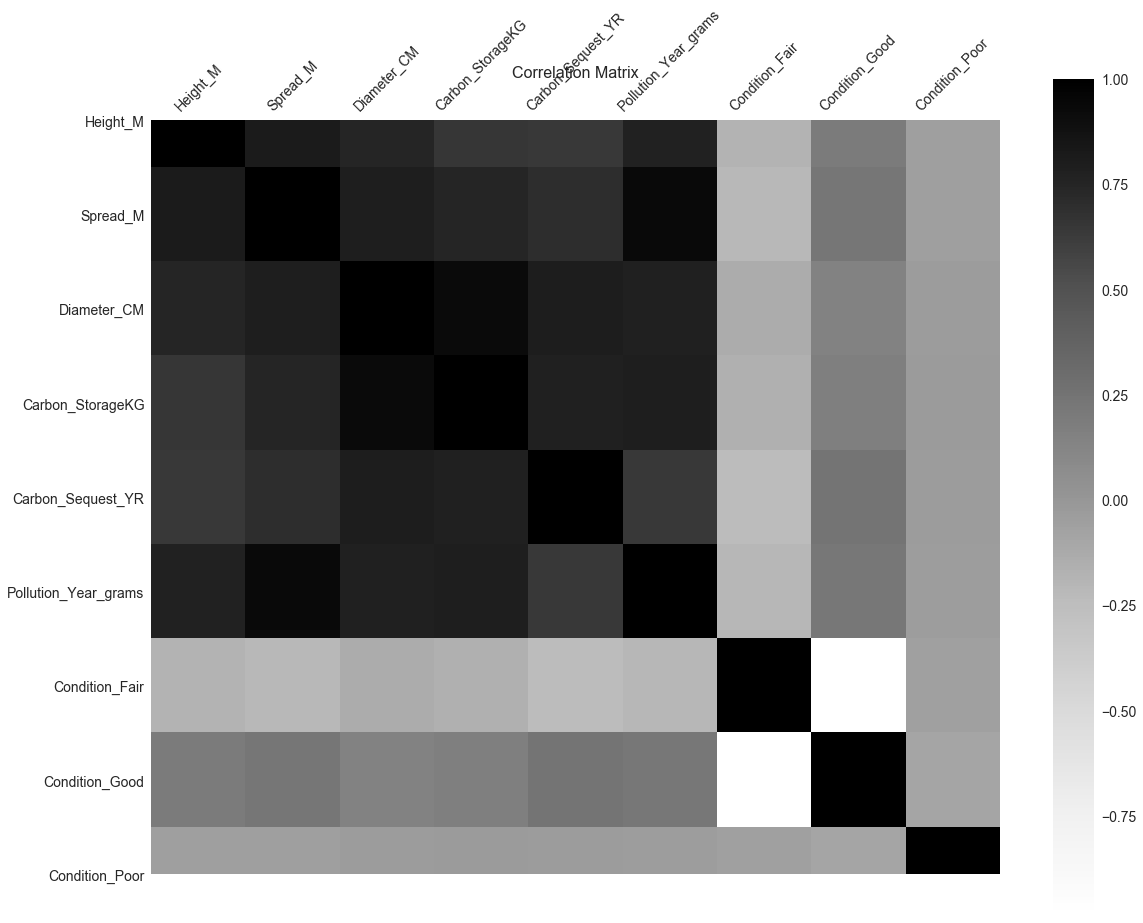

In [155]:
df = trees_in_Camden_final
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [131]:
df.describe()

,Height_M,Spread_M,Diameter_CM,Carbon_StorageKG,Carbon_Sequest_YR,Pollution_Year_grams,Condition_Fair,Condition_Good,Condition_Poor
count,"5,468.0000","5,468.0000","5,468.0000","5,468.0000","5,468.0000","5,468.0000","5,468.0000","5,468.0000","5,468.0000"
mean,15.9800,9.3911,57.2387,"1,066.0685",15.5299,460.1248,0.4069,0.5874,0.0055
std,6.0153,4.5523,28.9650,"1,258.1281",10.5292,423.1102,0.4913,0.4923,0.0739
min,1.0000,0.0000,3.0000,1.1000,0.3000,4.1000,0.0000,0.0000,0.0000
25%,12.0000,6.0000,39.0000,259.1500,7.6000,173.8000,0.0000,0.0000,0.0000
50%,16.0000,9.0000,54.0000,601.2000,12.7500,356.4000,0.0000,1.0000,0.0000
75%,20.0000,12.0000,71.0000,"1,294.0500",21.6000,584.0000,1.0000,1.0000,0.0000
max,41.0000,31.0000,228.0000,"6,000.0000",44.3000,"3,792.6000",1.0000,1.0000,1.0000


There are several ways to deal with multicolinearity in linear regression, including **stepwise regression**, **VIF**, and **Lasso**.

#### Stepwise regression

In [132]:
# This code comes from the module of Quantitative Methods (CASA0007), and is prepared by Dr Thomas Evans

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [133]:
# split the DataFrame into predictors and response
predictors_trees_in_Camden_final = trees_in_Camden_final.drop(columns=['Pollution_Year_grams'], axis=1)
response_trees_in_Camden_final = trees_in_Camden_final[['Pollution_Year_grams']]

In [134]:
# use stepwise regression on the bike_rental dataset
list_predictor_select_stepwise = stepwise_selection(X=predictors_trees_in_Camden_final, y=response_trees_in_Camden_final)
print("The predictors that are selected by stepwise regression are:")
print(list_predictor_select_stepwise)

Add  Diameter_CM                    with p-value 0.0
Add  Spread_M                       with p-value 0.0
Add  Carbon_StorageKG               with p-value 3.92532e-261
Add  Carbon_Sequest_YR              with p-value 5.23689e-127
Add  Height_M                       with p-value 4.41919e-31
Add  Condition_Fair                 with p-value 0.00157843
The predictors that are selected by stepwise regression are:
['Diameter_CM', 'Spread_M', 'Carbon_StorageKG', 'Carbon_Sequest_YR', 'Height_M', 'Condition_Fair']


C:\Users\SaraMoatti\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\SaraMoatti\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\SaraMoatti\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\SaraMoatti\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### VIF

The `Variance Inflation Factor` (VIF) is a measure of multicolinearity among predictors within a multiple regression task. It is the quotient of the variance in a model with multiple predictors by the variance of a model with a single predictor. More explanation of the theory can be found [here](https://en.wikipedia.org/wiki/Variance_inflation_factor). 

Steps for using VIF to deal with multicolineartiy are:

- Make a list of predictors, and loop over this list.
- For each predictor, compute its VIF using the steps
 - run a multiple regression using this predictor as the response against all the other predictors
 - Calculate the VIF for this predictor
 - If the VIF > 10, then multicolinearity is high. A cutoff of 5 is also commonly used. Remove this predictor.
- Move to the next predictor in the list, until all predictors are tested.

Below is an example of using VIF on the `bike_rental` dataset. Note that the `statsmodels` package is used.

In [135]:
# calculating VIF
# This function is from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def calculate_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with features removed
    '''
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    vif_df = pd.Series([variance_inflation_factor(const.values, i) 
               for i in range(const.shape[1])], 
              index=const.columns).to_frame()

    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]

    print('Features above VIF threshold:\n')
    print(vif_df[vif_df['VIF'] > thresh])

    col_to_drop = list(vif_df.index)

    for i in col_to_drop:
        print('Dropping: {}'.format(i))
        df = df.drop(columns=i)

    return df

In [136]:
# using VIF on the bike_rental dataset
df_predictors_select_VIF = calculate_vif_(predictors_trees_in_Camden_final)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Features above VIF threshold:

                                                      VIF
Condition_Good                                 1,326.6673
Condition_Fair                                 1,321.2968
Condition_Poor                                    30.8535
Diameter_CM                                        9.9453
Carbon_StorageKG                                   7.3790
Dropping: Condition_Good
Dropping: Condition_Fair
Dropping: Condition_Poor
Dropping: Diameter_CM
Dropping: Carbon_StorageKG
The columns remaining after VIF selection are:
Index(['Height_M', 'Spread_M', 'Carbon_Sequest_YR'], dtype='object')


## Linear regression

Now we can fit a linear regression model after dealing with the multicolinearity, and we will do it using the sklearn package. 

Just like clustering analysis in `sklearn`, we will run the regression model using the `.fit()` function. Make sure you get the variables the right way around.

In [137]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=df_predictors_select_VIF, y=response_trees_in_Camden_final)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
y_pred=lr.predict(df_predictors_select_VIF)

In [139]:
y_pred

array([[ 354.79874432],
       [ 434.45669974],
       [ 469.22484112],
       ...,
       [1357.95467382],
       [ 338.95666852],
       [ 788.60642742]])

Now that we've created our fit, it's time to look at the structure of the model and how well it fits the data.

There are a number of ways to do this. In the first instance, as with any linear regression model, we want to get a grip on the coefficients and intercept of the model. Helpfully, these two functions are built into the LinearRegression object. **Consult the documentation and see if you can find out how to extract these.**

In [150]:
print(lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": df_predictors_select_VIF.columns.values, "coef":lr.coef_[0]})
print(df_coef_lr_VIF)

[-380.44947908]
                 var                                     coef
0           Height_M                                   3.9856
1           Spread_M                                  85.5672
2  Carbon_Sequest_YR                                  -1.7183


The code below will generate the R2 score for us. Run the code and see how well the model performed.

In [151]:
lr.score(X=df_predictors_select_VIF, y=response_trees_in_Camden_final)

0.8784253656363856

It is quite difficult to get a good summary of the regression model using `sklearn` package. You can try it.

An alternative is to use the `statsmodel` package, which comes with a nice **summary()** function.

In [152]:
# fit a lineare regression model using statsmodel
regressor_OLS = sm.OLS(endog=response_trees_in_Camden_final, exog=sm.add_constant(df_predictors_select_VIF)).fit()
regressor_OLS.summary()

C:\Users\SaraMoatti\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Pollution_Year_grams   R-squared:                       0.878
Model:                              OLS   Adj. R-squared:                  0.878
Method:                   Least Squares   F-statistic:                 1.316e+04
Date:                  Sun, 17 May 2020   Prob (F-statistic):               0.00
Time:                          17:22:48   Log-Likelihood:                -35066.
No. Observations:                  5468   AIC:                         7.014e+04
Df Residuals:                      5464   BIC:                         7.017e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -380.4495      5.694    -66.813      0.000    -391.612    -369.286
Height_M              3.9856      0.571      6.978      0.000       2.866       5.105
Spread_M             85.5672      0.817    104.680      0.000      83.965      87.170
Carbon_Sequest_YR    -1.7183      0.271     -6.351      0.000      -2.249      -1.188
==============================================================================
Omnibus:                     3094.298   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57661.480
Skew:                           2.315   Prob(JB):                         0.00
Kurtosis:                      18.220   Cond. No.                         76.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the R2 value of 0.878 is good, meaning that only 87.8% of the variance in y can be explained by the predictors used.


Growth rate:  “The designation slow means the plant grows 12” or less per year; medium refers to 13 to 24” of growth per year; and fast to 25” or greater.”

In [144]:
# prediction after 5 years on 3 common trees
# height: 1m/1 year
# Spread: 0.5m/1year
# CArbon seq: average 2.5 kg after 1 year growth
London_Plane= trees_in_Camden[(trees_in_Camden.Com_Name =='London plane')]
London_Plane_Cleaned=London_Plane.drop(['Unnamed: 0','id','No_Trees','Site_Name','Maturity','Condition','Pollution_Year_grams','Diameter_CM','Carbon_StorageKG','Com_Name','Sci_Name','Date','Removed_Soon','Newly_Planted','Ward_Code','Ward_Name','Lon','Lat','Loc','Loc','Uploaded','Amenity_Value'],axis = 1)
London_Plane_Height = London_Plane_Cleaned['Height_M']
London_Plane_Spread = London_Plane_Cleaned['Spread_M']
London_Plane_Carbon_Sequest = London_Plane_Cleaned['Carbon_Sequest_YR']
Pred_London_Plane=London_Plane_Cleaned.assign(Height_M = London_Plane_Height+5 , Spread_M = London_Plane_Spread+2.5 , Carbon_Sequest_YR = London_Plane_Carbon_Sequest+10 )
Pred_London_Plane

,Height_M,Spread_M,Carbon_Sequest_YR
16,23.0000,11.5000,27.3000
18,17.0000,9.5000,18.9000
20,31.0000,20.5000,53.0000
24,17.0000,9.5000,28.0000
38,13.0000,6.5000,11.6000
...,...,...,...
19887,22.0000,13.5000,25.6000
19888,24.0000,17.5000,45.1000
19894,15.0000,9.5000,20.9000
19914,28.0000,22.5000,47.6000


In [145]:
Lime_Common = trees_in_Camden[(trees_in_Camden.Com_Name =='Lime - Common')]
Lime_Common_Cleaned=Lime_Common.drop(['Unnamed: 0','id','No_Trees','Site_Name','Maturity','Condition','Pollution_Year_grams','Diameter_CM','Carbon_StorageKG','Com_Name','Sci_Name','Date','Removed_Soon','Newly_Planted','Ward_Code','Ward_Name','Lon','Lat','Loc','Loc','Uploaded','Amenity_Value'],axis = 1)
Lime_Common_Height = Lime_Common_Cleaned['Height_M']
Lime_Common_Spread = Lime_Common_Cleaned['Spread_M']
Lime_Common_Carbon_Sequest = Lime_Common_Cleaned['Carbon_Sequest_YR']
Pred_Lime_Common=Lime_Common_Cleaned.assign(Height_M = Lime_Common_Height+5 , Spread_M = Lime_Common_Spread+2.5 , Carbon_Sequest_YR = Lime_Common_Carbon_Sequest+10)
Pred_Lime_Common

,Height_M,Spread_M,Carbon_Sequest_YR
1,21.0000,10.5000,17.6000
11,19.0000,11.5000,16.4000
14,31.0000,11.5000,24.0000
15,15.0000,10.5000,14.6000
19,21.0000,14.5000,18.6000
...,...,...,...
19839,25.0000,11.5000,16.3000
19843,25.0000,17.5000,29.4000
19857,20.0000,7.5000,17.9000
19862,24.0000,9.5000,21.2000


In [147]:
Maple_Norway = trees_in_Camden_sample[(trees_in_Camden_sample.Com_Name =='Maple - Norway')]
Maple_Norway_Cleaned=Maple_Norway.drop(['Unnamed: 0','id','No_Trees','Site_Name','Maturity','Condition','Pollution_Year_grams','Diameter_CM','Carbon_StorageKG','Com_Name','Sci_Name','Date','Removed_Soon','Newly_Planted','Ward_Code','Ward_Name','Lon','Lat','Loc','Loc','Uploaded','Amenity_Value'],axis = 1)
Maple_Norway_Height = Maple_Norway_Cleaned['Height_M']
Maple_Norway_Spread = Maple_Norway_Cleaned['Spread_M']
Maple_Norway_Carbon_Sequest = Maple_Norway_Cleaned['Carbon_Sequest_YR']
Pred_Maple_Norway_Cleaned=Maple_Norway_Cleaned.assign(Height_M = Maple_Norway_Height+5 , Spread_M = Maple_Norway_Spread+2.5 , Carbon_Sequest_YR = Maple_Norway_Carbon_Sequest+10)
Pred_Maple_Norway_Cleaned

,Height_M,Spread_M,Carbon_Sequest_YR
50,19.0000,12.5000,22.0000
108,17.0000,11.5000,19.0000
112,12.0000,9.5000,16.7000
142,17.0000,8.5000,15.8000
192,23.0000,9.5000,21.0000
...,...,...,...
19854,15.0000,7.5000,14.2000
19866,21.0000,12.5000,23.4000
19885,19.0000,13.5000,28.0000
19891,19.0000,10.5000,22.2000


In [148]:
frames = [Pred_Sycamore_Cleaned, Pred_Lime_Common, Pred_London_Plane]
Growth = pd.concat(frames)
Growth

,Height_M,Spread_M,Carbon_Sequest_YR
28,23.0000,15.5000,30.5000
31,11.0000,5.5000,12.4000
66,25.0000,10.5000,19.2000
102,17.0000,8.5000,18.6000
109,23.0000,10.5000,18.8000
...,...,...,...
19887,22.0000,13.5000,25.6000
19888,24.0000,17.5000,45.1000
19894,15.0000,9.5000,20.9000
19914,28.0000,22.5000,47.6000


In [149]:
#this is the final predicted pollution removal
y_pred=lr.predict(Growth)
y_pred

array([[ 985.10239256],
       [ 112.70467769],
       [ 584.65472253],
       ...,
       [ 456.31017637],
       [1574.61749962],
       [1005.26925323]])